1. IMPORTING LIBRARIES

In [3]:
# Importing libraries
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import *
from sklearn.metrics import *
from tensorflow.keras import *
from keras.models import load_model
from tensorflow.keras.utils import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2. LOADING THE DATA

In [4]:
# Loading Training Data
training_dir = 'Training/'
training_paths = []
train_labels = []

for label in os.listdir(training_dir):
    for file in os.listdir(training_dir+label):
        training_paths.append(training_dir+label+'/'+file)
        train_labels.append(label)
random.shuffle(training_paths)
random.shuffle(train_labels)


# show an example of the list
training_paths[0]

'Training/meningioma/Tr-me_1195.jpg'

In [5]:
len(training_paths)

5712

In [6]:
# Loading Testing/Validation Data
test_dir = 'Testing/'
test_paths = []
test_labels = []
for label in os.listdir(test_dir):
    for file in os.listdir(test_dir+label):
        test_paths.append(test_dir+label+'/'+file)
        test_labels.append(label)
random.shuffle(test_paths)
random.shuffle(test_labels)

# test_paths, test_labels = shuffle(test_paths, test_labels)

# show an example of the list
print(test_paths[0])

Testing/notumor/Te-no_0305.jpg


In [7]:
len(test_paths)

1311

In [8]:
# Specifying the labels / classes

labels = os.listdir(training_dir) 
labels


['glioma', 'meningioma', 'notumor', 'pituitary']

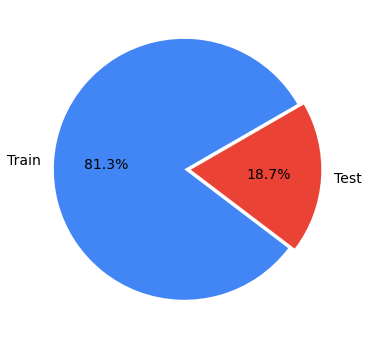

In [9]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len(train_labels), len(test_labels)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30);

3. DATA AUGMENTATION

In [10]:
def open_images(paths):
    '''
    Given a list of paths to images, this function returns the images as arrays (after augmenting them)
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=(227,227))
        image = image.convert('RGB')
        image = np.array(image)/255.0
        images.append(image)
    return np.array(images)

def get_labels(paths):
    label = []
    for path in paths:
        path = path.split('/')[-2]
        label.append(labels.index(path))
    return label

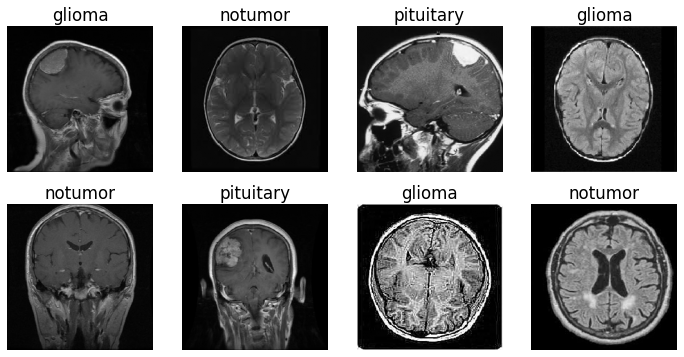

In [11]:
# i = random.randint(0,len(training_paths))
images = open_images(training_paths[50:59])
xlabels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(xlabels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 10})
plt.show()

4. DATA GENERATOR

In [12]:
# Expand the size of a training set by creating modified data from existing one
def data_gen(data_paths, batch_size=10):
    '''
    Given the image paths, it yields the images with the respective labels, as a batch
    '''
    for i in range(0, len(data_paths), batch_size):
        paths = data_paths[i:i+batch_size]
        images = open_images(paths)
        labels = get_labels(paths)
        yield images,np.array(labels)

5. BUILDING THE AlexNet MODEL

In [13]:
# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding= 'valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding= 'valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(227*227*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 23, 23, 256)       0

In [14]:
len (model.layers)

33

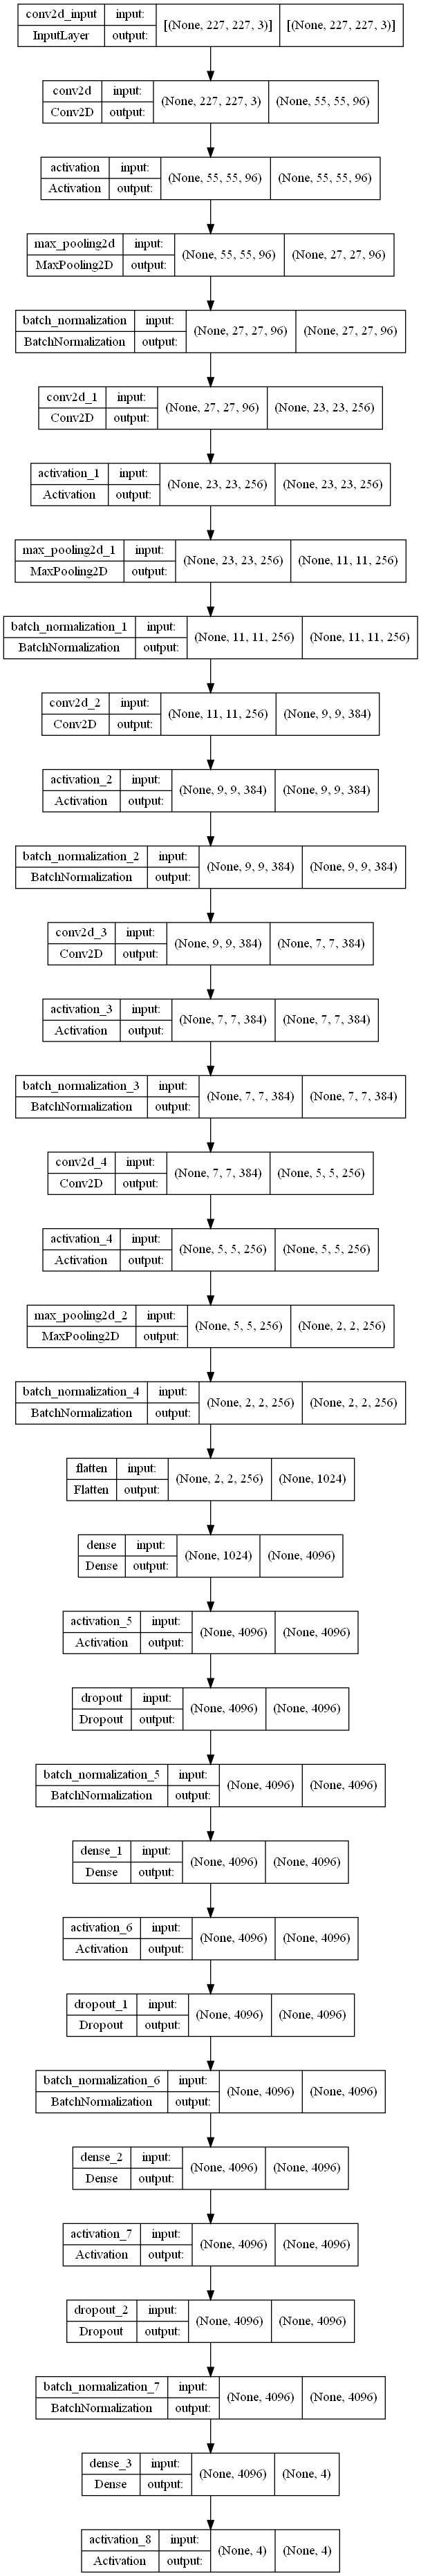

In [15]:
plot_model(model, show_shapes=True, to_file="Model Layers/alexnet.png")

6. TRAINING THE MODEL

In [16]:

model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy', # sparse is cheaper in terms of computation
             metrics=['sparse_categorical_accuracy'])

In [17]:
# Training the Model

batch_size=256

history = model.fit(data_gen(training_paths), 
epochs=20, 
steps_per_epoch=int(len(training_paths)/batch_size), 
validation_data= data_gen(test_paths), 
validation_steps=int(len(test_paths)/batch_size))

Epoch 1/20
22/22 [==============================] - 20s 833ms/step - loss: 1.4269 - sparse_categorical_accuracy: 0.4227 - val_loss: 1.5008 - val_sparse_categorical_accuracy: 0.3000
Epoch 2/20
22/22 [==============================] - 18s 795ms/step - loss: 1.3462 - sparse_categorical_accuracy: 0.5227 - val_loss: 1.6472 - val_sparse_categorical_accuracy: 0.2800
Epoch 3/20
22/22 [==============================] - 16s 745ms/step - loss: 1.1681 - sparse_categorical_accuracy: 0.5682 - val_loss: 2.1248 - val_sparse_categorical_accuracy: 0.2200
Epoch 4/20
22/22 [==============================] - 16s 732ms/step - loss: 1.5403 - sparse_categorical_accuracy: 0.4773 - val_loss: 1.8301 - val_sparse_categorical_accuracy: 0.2800
Epoch 5/20
22/22 [==============================] - 16s 748ms/step - loss: 1.3556 - sparse_categorical_accuracy: 0.5273 - val_loss: 3.0996 - val_sparse_categorical_accuracy: 0.2000
Epoch 6/20
22/22 [==============================] - 16s 748ms/step - loss: 1.2199 - sparse_cate

In [18]:
model.save('alexnet.h5')

7. EVALUATING THE MODEL

In [19]:
model = load_model('alexnet.h5')

In [20]:
evaluation = model.evaluate(data_gen(test_paths))

print('Test Loss:', evaluation[0])
print ('Test Accuracy:', evaluation[1])

132/132 [==============================] - 19s 140ms/step - loss: 1.8716 - sparse_categorical_accuracy: 0.5431
Test Loss: 1.8715873956680298
Test Accuracy: 0.5430968999862671


Predicted: notumor
Actual: meningioma


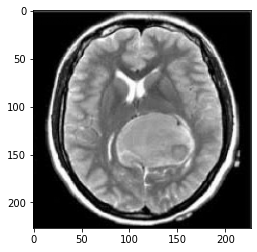

In [21]:
i = random.randint(0,len(test_paths))
images = open_images([test_paths[i]])
predicted = model.predict(images)[0]
predicted = np.argmax(predicted)
predicted = labels[predicted]
label = test_paths[i].split('/')[-2]
plt.imshow(images[0])
print('Predicted:', predicted)
print('Actual:', label)

In [22]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


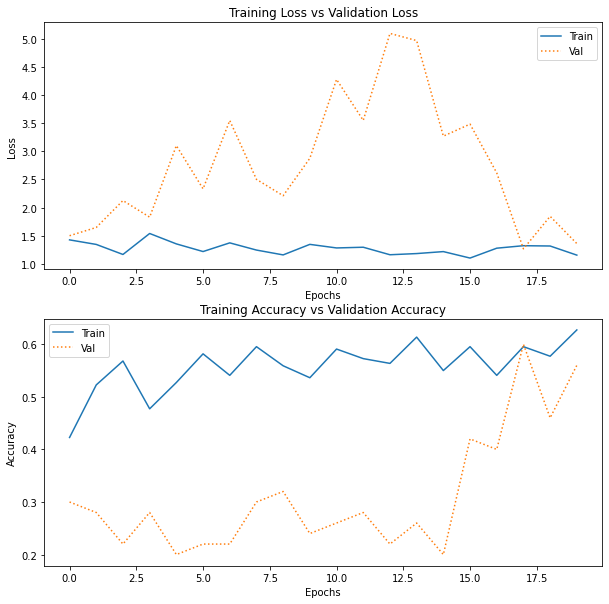

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'], linestyle='dotted')
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['sparse_categorical_accuracy'])
axs[1].plot(history.history['val_sparse_categorical_accuracy'], linestyle='dotted')
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

8. CLASSIFICATION REPORT AND CONFUSION MATRIX

In [24]:
# For Classification Report
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(test_dir, 
                                                    target_size=(227,227), 
                                                    shuffle=False, 
                                                    seed=21,
                                                    class_mode='sparse', 
                                                    batch_size=16)

Found 1311 images belonging to 4 classes.


In [25]:
classes = labels

#On test dataset
Y_pred = model.predict(test_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

82/82 [==============================] - 16s 190ms/step


In [26]:
#Classification Report

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      glioma       0.77      0.23      0.35       300
  meningioma       0.60      0.25      0.35       306
     notumor       0.78      0.66      0.71       405
   pituitary       0.40      0.99      0.57       300

    accuracy                           0.54      1311
   macro avg       0.64      0.53      0.50      1311
weighted avg       0.65      0.54      0.51      1311



In [27]:
# For Confusion Matrix
target_labels = ["glioma", "meningioma", "notumor", "pituitary"]

Generator = ImageDataGenerator(rescale=1./255)
test_gen = Generator.flow_from_directory(test_dir,
                                          target_size = (227,227),
                                          color_mode = 'rgb',
                                          classes = target_labels,
                                          class_mode = 'sparse',
                                          batch_size = 16,
                                          shuffle = False,
                                         )

Found 1311 images belonging to 4 classes.


In [28]:
def test_model(model, test_generator):
    y_pred = model.predict(x = test_generator, verbose = 1)
    print(y_pred.shape)
    print(y_pred[:10])
    return y_pred

In [29]:
y_pred = test_model(model, test_gen)
print(y_pred[:10])

82/82 [==============================] - 16s 192ms/step
(1311, 4)
[[3.32344323e-04 4.59831441e-03 6.39251545e-02 9.31144178e-01]
 [1.19512916e-01 7.23825069e-04 2.95036525e-01 5.84726810e-01]
 [9.79660213e-01 1.90716000e-05 1.86841842e-02 1.63658627e-03]
 [5.89945633e-03 3.47500473e-01 4.14178044e-01 2.32422039e-01]
 [8.64225402e-02 1.00176246e-03 4.16134208e-01 4.96441483e-01]
 [2.60884106e-01 6.88987672e-01 3.14962380e-02 1.86320599e-02]
 [9.59576517e-02 1.11046424e-02 1.87231392e-01 7.05706298e-01]
 [9.91889089e-02 2.77651264e-03 3.04801762e-01 5.93232870e-01]
 [9.71220136e-02 1.24330097e-03 3.60747546e-01 5.40887177e-01]
 [7.68177807e-02 1.79788924e-03 3.39100957e-01 5.82283437e-01]]
[[3.32344323e-04 4.59831441e-03 6.39251545e-02 9.31144178e-01]
 [1.19512916e-01 7.23825069e-04 2.95036525e-01 5.84726810e-01]
 [9.79660213e-01 1.90716000e-05 1.86841842e-02 1.63658627e-03]
 [5.89945633e-03 3.47500473e-01 4.14178044e-01 2.32422039e-01]
 [8.64225402e-02 1.00176246e-03 4.16134208e-01 4.96

In [30]:
Y_pred = (y_pred > 0.5).astype(int)
print(Y_pred[:10])

[[0 0 0 1]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


In [31]:
print(test_gen.labels[:10])

[0 0 0 0 0 0 0 0 0 0]


In [32]:
labelBinarizer = LabelBinarizer()
test_labels = labelBinarizer.fit_transform(test_gen.labels)
print(test_labels[:10])

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [33]:
def plot_cf_matrix(confusion_matrix, axes, class_label, class_names, fontsize = 10):
    df_cm = pd.DataFrame(confusion_matrix, index = class_names, columns = class_names,)

    try:
        heatmap = sns.heatmap(df_cm, annot = True, fmt = "d", cbar = False, ax = axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 45, ha = 'right', fontsize = fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("class : " + class_label)

In [34]:
def plot_confusion_matrices(conf_matrices, target_labels):
    fig, ax = plt.subplots(1, len(target_labels), figsize = (15, 5))

    for axes, cfs_matrix, label in zip(ax.flatten(), conf_matrices, target_labels):
        plot_cf_matrix(cfs_matrix, axes, label, ["POSITIVE", "NEGATIVE" ])

    fig.tight_layout()
    plt.show()

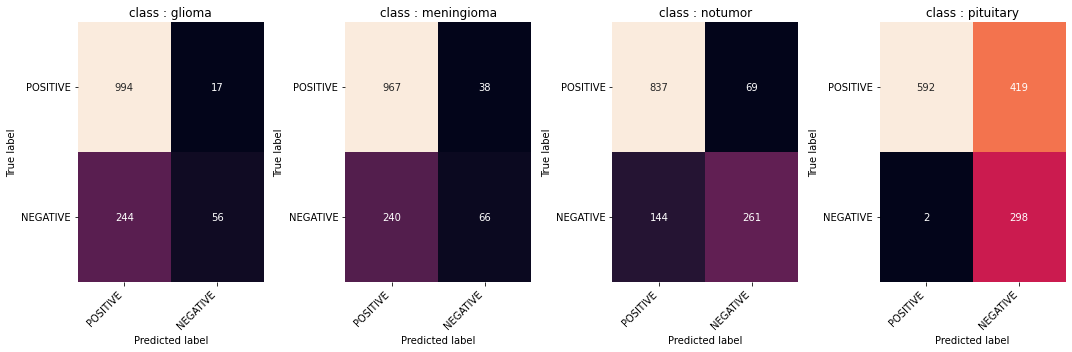

In [35]:
conf_matrices = multilabel_confusion_matrix(y_true = test_labels, y_pred = Y_pred, labels = [0, 1, 2, 3])
plot_confusion_matrices(conf_matrices, target_labels)

9. TEST WITH EXTERNAL DATASET

In [36]:
# Testing Directory
test2_dir = 'Testing_/'
test2_paths = []
test2_labels = []
for label in os.listdir(test2_dir):
    for file in os.listdir(test2_dir+label):
        test2_paths.append(test2_dir+label+'/'+file)
        test2_labels.append(label)
random.shuffle(test2_paths)
random.shuffle(test2_labels)

# test_paths, test_labels = shuffle(test_paths, test_labels)

# show an example of the list
print(test2_paths[0])

Testing_/notumor/image(75).jpg


In [37]:
len(test2_paths)

394

In [38]:
evaluation = model.evaluate(data_gen(test2_paths))

print('Test Loss:', evaluation[0])
print ('Test Accuracy:', evaluation[1])

40/40 [==============================] - 5s 134ms/step - loss: 3.1201 - sparse_categorical_accuracy: 0.3173
Test Loss: 3.120091199874878
Test Accuracy: 0.31725889444351196


In [39]:
# For New Dataset
test_generator2 = ImageDataGenerator(rescale=1./255)
test_generator2 = test_generator2.flow_from_directory(test2_dir, target_size=(227,227), shuffle=False, seed=21,
                                                     class_mode='sparse', batch_size=16)

Found 394 images belonging to 4 classes.


In [40]:
labels2 = os.listdir(test2_dir) 
labels2

['glioma', 'meningioma', 'notumor', 'pituitary']

In [41]:
classes = labels2

#On test2 dataset
Y_pred = model.predict(test_generator2)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

In [42]:
#Classification Report
print('Classification Report')
print(classification_report(test_generator2.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      glioma       0.31      0.04      0.07       100
  meningioma       0.42      0.20      0.27       115
     notumor       0.29      0.42      0.34       105
   pituitary       0.31      0.73      0.43        74

    accuracy                           0.32       394
   macro avg       0.33      0.35      0.28       394
weighted avg       0.34      0.32      0.27       394

